# 토픽 모델링(Topic Modeling)
토픽 모델링(Topic Modeling)이란 기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나

텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법

# 잠재 의미 분석(Latent Semantic Analysis, LSA)
BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있음

이를 위한 대안으로 DTM의 잠재된(Latent) 의미를 이끌어내는 방법으로 잠재 의미 분석(Latent Semantic Analysis, LSA)이라는 방법이 있음

LSA는 기본적으로 DTM이나 TF-IDF 행렬에 절단된 SVD(truncated SVD)를 사용하여 차원을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다는 아이디어를 갖고 있음

실습을 통해서 이해
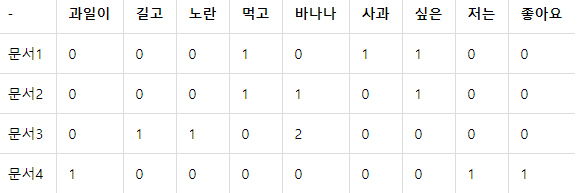

위와 같은 DTM을 실제로 파이썬을 통해서 만들면 아래와 같음

In [2]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4, 9)

4 × 9의 크기를 가지는 DTM이 생성<br/>
이에 대해서 풀 SVD(full SVD)를 수행

In [3]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
print(U.round(2))
np.shape(U)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4, 4)

4 × 4의 크기를 가지는 직교 행렬 U가 생성됨. 이제 대각 행렬 S를 확인

In [5]:
print(s.round(2))
np.shape(s)

[2.69 2.05 1.73 0.77]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4,)

Numpy의 linalg.svd()는 특이값 분해의 결과로 대각 행렬이 아니라 특이값의 리스트를 반환.
그러므로 앞서 본 수식의 형식으로 보려면 이를 다시 대각 행렬로 바꾸어 주어야 함

In [6]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4, 9)

4 × 9의 크기를 가지는 대각 행렬 S가 생성되었음. 2.69 > 2.05 > 1.73 > 0.77 순으로 값이 내림차순을 보이는 것을 확인

In [7]:
print(VT.round(2))
np.shape(VT)

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9, 9)

9 × 9의 크기를 가지는 직교 행렬 VT(V의 전치 행렬)가 생성되었습니다. 즉, U × S × VT를 하면 기존의 행렬 A가 나와야 함.

Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴. Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴

In [8]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

지금까지 수행한 것은 풀 SVD(Full SVD). 이제 t를 정하고, 절단된 SVD(Truncated SVD)를 수행.

여기서는 t=2로 지정.

In [9]:
S=S[:2,:2]
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


상위 2개의 값만 남기고 나머지는 모두 제거된 것을 볼 수 있음. 이제 직교 행렬 U에 대해서도 2개의 열만 남기고 제거

In [10]:
U=U[:,:2]
print(U.round(2))

[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2개의 열만 남기고 모두 제거된 것을 확인. 이제 행렬 V의 전치 행렬인 VT에 대해서 2개의 행만 남기고 제거. 

In [11]:
VT=VT[:2,:]
print(VT.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


이제 축소된 행렬 U, S, VT에 대해서 다시 U × S × VT연산을 하면 기존의 A와는 다른 결과가 나오게 됨.

값이 손실되었기 때문에 이 세 개의 행렬로는 이제 기존의 A행렬을 복구할 수 없습니다. U × S × VT연산을 해서 나오는 값을 A_prime이라 하고 기존의 행렬 A와 값을 비교

In [12]:
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


대체적으로 기존에 0인 값들은 0에 가가운 값이 나오고, 1인 값들은 1에 가까운 값이 나오는 것을 확인

## 실습을 통한 이해
사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터를 제공

여기서는 LSA를 사용해서 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행

### 뉴스그룹 데이터에 대한 이해

In [13]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11314

훈련에 사용할 뉴스그룹 데이터는 총 11,314개입니다. 이 중 첫번째 훈련용 샘플을 출력

In [14]:
documents[1]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

뉴스그룹 데이터에는 특수문자가 포함된 다수의 영어문장으로 구성되어져 있음. 이런 형식의 샘플이 총 11,314개 존재합니다. 사이킷런이 제공하는 뉴스그룹 데이터에서 target_name에는 본래 이 뉴스그룹 데이터가 어떤 20개의 카테고리를 갖고있었는지가 저장되어져 있습니다. 이를 출력

In [15]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 텍스트 전처리
작하기 앞서, 텍스트 데이터에 대해서 가능한한 정제 과정을 거쳐야만 함

기본적인 아이디어는 알파벳을 제외한 구두점, 숫자, 특수 문자를 제거하는 것

In [16]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-b4124dfb5e6a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [17]:
news_df['clean_doc'][1]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

불용어를 제거하기 위해서 토큰화를 우선 수행. 후에 불용어 제거

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## TF-IDF 행렬 만들기
불용어 제거를 위해 토큰화 작업을 수행하였지만, TfidfVectorizer(TF-IDF 챕터 참고)는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용.

그렇기 때문에 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해서 다시 토큰화 작업을 역으로 취소하는 작업을 수행. 이를 역토큰화라 함

In [20]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

news_df['clean_doc'][1]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

정상적으로 불용어가 제거된 상태에서 역토큰화가 수행되었음을 확인

이제 사이킷런의 TfidfVectorizer를 통해 단어 1,000개에 대한 TF-IDF 행렬을 만들 것

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11314, 1000)

## 토픽 모델링(Topic Modeling)
이제 TF-IDF 행렬을 다수의 행렬로 분해. 여기서는 사이킷런의 절단된 SVD(Truncated SVD)를 사용

원래 기존 뉴스그룹 데이터가 20개의 카테고리를 갖고있었기 때문에, 20개의 토픽을 가졌다고 가정하고 토픽 모델링을 시도

In [22]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20

In [23]:
np.shape(svd_model.components_)#svd_modle은 VT에 해당

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 1000)

정확하게 토픽의 수 t × 단어의 수의 크기를 가지는 것을 확인

In [24]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LSA의 장단점(Pros and Cons of LSA)
정리해보면 LSA는 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적인 의미를 이끌어낼 수 있어 문서의 유사도 계산 등에서 좋은 성능을 보여준다는 장점을 갖고 있음.

하지만 SVD의 특성상 이미 계산된 LSA에 새로운 데이터를 추가하여 계산하려고하면 보통 처음부터 다시 계산해야 함

# 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘

## 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA) 개요
우선 LDA의 내부 메커니즘에 대해서 이해하기 전에, LDA를 일종의 블랙 박스로 보고 LDA에 문서 집합을 입력하면, 어떤 결과를 보여주는지 간소화 된 예를 들어 보겠습니다.

* 문서1 : 저는 사과랑 바나나를 먹어요
* 문서2 : 우리는 귀여운 강아지가 좋아요
* 문서3 : 저의 깜찍하고 귀여운 강아지가 바나나를 먹어요

LDA를 수행할 때 문서 집합에서 토픽이 몇 개가 존재할지 가정하는 것은 사용자가 해야 할 일. 여기서는 LDA에 2개의 토픽을 찾으라고 요청

LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정

<b><각 문서의 토픽 분포></b><br/>
문서1 : 토픽 A 100%<br/>
문서2 : 토픽 B 100%<br/>
문서3 : 토픽 B 60%, 토픽 A 40%<br/>

<b><각 토픽의 단어 분포></b><br/>
토픽A : 사과 20%, 바나나 40%, 먹어요 40%, 귀여운 0%, 강아지 0%, 깜찍하고 0%, 좋아요 0%<br/>
토픽B : 사과 0%, 바나나 0%, 먹어요 0%, 귀여운 33%, 강아지 33%, 깜찍하고 16%, 좋아요 16%
    
LDA는 토픽의 제목을 정해주지 않지만, 이 시점에서 알고리즘의 사용자는 위 결과로부터 두 토픽이 각각 과일에 대한 토픽과 강아지에 대한 토픽이라고 판단해볼 수 있습니다

## LDA의 가정
LDA는 문서의 집합으로부터 어떤 토픽이 존재하는지를 알아내기 위한 알고리즘

LDA는 단어의 순서는 신경쓰지 않음

## LDA의 수행하기
이제 LDA의 수행 과정을 정리

<b>1) 사용자는 알고리즘에게 토픽의 개수 k를 알려줍니다.</b><br/>
<b>2) 모든 단어를 k개 중 하나의 토픽에 할당합니다.</b><br/>
<b>3) 이제 모든 문서의 모든 단어에 대해서 아래의 사항을 반복 진행합니다. (iterative)</b><br/>
<b>3-1) 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정합니다. 이에 따라 단어 w는 아래의 두 가지 기준에 따라서 토픽이 재할당됩니다.</b><br/>
- p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
- p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포

## 잠재 디리클레 할당과 잠재 의미 분석의 차이
LSA : DTM을 차원 축소 하여 축소 차원에서 근접 단어들을 토픽으로 묶는다.<br/>
LDA : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출한다.

## 실습을 통한 이해
이번 챕터에서는 gensim을 사용

### 정수 인코딩과 단어 집합 만들기
바로 이전 챕터인 LSA 챕터에서 사용하였던 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스 데이터를 다시 사용

In [25]:
tokenized_doc[:5]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다

word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미

이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있음

In [26]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\User\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


위의 출력 결과 중에서 (66, 2)는 정수 인코딩이 66으로 할당된 단어가 두번째 뉴스에서는 두 번 등장하였음을 의미

In [27]:
print(dictionary[66])

faith


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


기존에는 단어 'faith'이었음을 알 수 있습니다. 총 학습된 단어의 개수를 확인해보겠습니다. 이는 dictionary의 길이를 확인

In [28]:
len(dictionary)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


64281

### LDA 모델 훈련시키기
기존의 뉴스 데이터가 총 20개의 카테고리를 가지고 있었으므로 토픽의 개수를 20으로 하여 LDA 모델을 학습

In [29]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.013*"thanks" + 0.013*"would" + 0.012*"drive" + 0.012*"know"')
(1, '0.016*"file" + 0.011*"program" + 0.009*"available" + 0.007*"files"')
(2, '0.011*"would" + 0.011*"president" + 0.010*"people" + 0.008*"think"')
(3, '0.009*"chip" + 0.009*"used" + 0.007*"number" + 0.006*"char"')
(4, '0.024*"henrik" + 0.013*"candida" + 0.012*"azeris" + 0.011*"plane"')
(5, '0.029*"period" + 0.016*"power" + 0.013*"play" + 0.012*"scorer"')
(6, '0.025*"health" + 0.021*"medical" + 0.014*"disease" + 0.013*"water"')
(7, '0.011*"said" + 0.009*"like" + 0.009*"know" + 0.008*"people"')
(8, '0.021*"game" + 0.020*"team" + 0.016*"games" + 0.012*"season"')
(9, '0.008*"book" + 0.008*"good" + 0.007*"like" + 0.006*"much"')
(10, '0.014*"israel" + 0.013*"armenian" + 0.012*"jews" + 0.011*"turkish"')
(11, '0.015*"good" + 0.012*"year" + 0.009*"much" + 0.008*"last"')
(12, '0.013*"would" + 0.011*"people" + 0.008*"think" + 0.006*"know"')
(13, '0.024*"encryption" + 0.019*"security" + 0.016*"privacy" + 0.015*"clipper"')
(14, '

각 단어 앞에 붙은 수치는 단어의 해당 토픽에 대한 기여도를 보여줌

만약 10개의 단어를 출력하고 싶다면 아래의 코드를 수행

In [30]:
print(ldamodel.print_topics())

[(0, '0.013*"thanks" + 0.013*"would" + 0.012*"drive" + 0.012*"know" + 0.011*"anyone" + 0.010*"please" + 0.010*"like" + 0.010*"windows" + 0.009*"card" + 0.009*"system"'), (1, '0.016*"file" + 0.011*"program" + 0.009*"available" + 0.007*"files" + 0.007*"window" + 0.006*"version" + 0.006*"entry" + 0.006*"image" + 0.006*"software" + 0.006*"information"'), (2, '0.011*"would" + 0.011*"president" + 0.010*"people" + 0.008*"think" + 0.008*"government" + 0.008*"going" + 0.007*"money" + 0.006*"work" + 0.005*"know" + 0.005*"make"'), (3, '0.009*"chip" + 0.009*"used" + 0.007*"number" + 0.006*"char" + 0.006*"output" + 0.006*"bits" + 0.005*"wire" + 0.005*"system" + 0.005*"current" + 0.005*"keys"'), (4, '0.024*"henrik" + 0.013*"candida" + 0.012*"azeris" + 0.011*"plane" + 0.010*"karabakh" + 0.010*"infections" + 0.009*"planes" + 0.009*"part" + 0.007*"yeast" + 0.006*"males"'), (5, '0.029*"period" + 0.016*"power" + 0.013*"play" + 0.012*"scorer" + 0.007*"hartford" + 0.007*"second" + 0.007*"third" + 0.007*"sw

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA 시각화 하기
LDA 시각화를 위해서는 pyLDAvis의 설치가 필요
``` pip install pyLDAvis ```

In [33]:
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 문서 별 토픽 분포 보기
각 문서의 토픽 분포는 이미 훈련된 LDA 모델인 ldamodel[]에 전체 데이터가 정수 인코딩 된 결과를 넣은 후에 확인이 가능

In [34]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(2, 0.018625509), (3, 0.107496455), (10, 0.40153766), (12, 0.3395035), (17, 0.10412686), (19, 0.017189693)]
1 번째 문서의 topic 비율은 [(5, 0.027480708), (6, 0.027863849), (11, 0.105553955), (12, 0.8180339)]
2 번째 문서의 topic 비율은 [(7, 0.07610894), (10, 0.43566224), (12, 0.47450432)]
3 번째 문서의 topic 비율은 [(0, 0.036594503), (3, 0.02951936), (9, 0.121654324), (11, 0.150582), (12, 0.36450493), (13, 0.24006768), (16, 0.046744414)]
4 번째 문서의 topic 비율은 [(8, 0.4088306), (11, 0.5578242)]


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,10.0,0.4015,"[(2, 0.018625285), (3, 0.107496336), (10, 0.40..."
1,1,12.0,0.8180,"[(5, 0.027480708), (6, 0.027863847), (11, 0.10..."
2,2,12.0,0.4746,"[(7, 0.07600142), (10, 0.43566146), (12, 0.474..."
3,3,12.0,0.3645,"[(0, 0.036573872), (3, 0.029512832), (9, 0.121..."
4,4,11.0,0.5578,"[(8, 0.4088138), (11, 0.557841)]"
5,5,12.0,0.5155,"[(4, 0.24937156), (10, 0.052091762), (12, 0.51..."
6,6,11.0,0.3181,"[(0, 0.2653504), (1, 0.15569118), (7, 0.054324..."
7,7,12.0,0.4741,"[(1, 0.054314386), (3, 0.102867305), (7, 0.146..."
8,8,7.0,0.6282,"[(1, 0.14216706), (2, 0.17536335), (7, 0.62822..."
9,9,11.0,0.2759,"[(0, 0.24634528), (3, 0.08892885), (7, 0.11603..."
